In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from everything import do_everything_before, do_everything_between, do_everything_after, get_train_command, get_test_ssim_psnr
import numpy as np
import os
import torch
from RCAN_files.RCAN_TrainCode.code import model
from RCAN_files.RCAN_TrainCode.code.utility import checkpoint
import matplotlib.pyplot as plt
from PIL import Image
from interpolate import linear_interpolate
from scipy import fft
import tifffile

c:\Users\robho\anaconda3\envs\pipeline\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
TRAIN_DIR_TILED_90 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.0728_tiled/"
TRAIN_DIR_TILED_20 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.3276_linear_tiled/"

TEST_DIR_TILED_90  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_tiled/"
TEST_DIR_TILED_20  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_tiled/"

SEG_TEST_DIR_90    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_linear_tiled_90x_segmentations/"
SEG_TEST_DIR_20    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_tiled_90x_segmentations/"

In [4]:
output_90_linear = do_everything_after(TRAIN_DIR_TILED_90,TEST_DIR_TILED_90,SEG_TEST_DIR_90)
percarr_90_linear,cells_90_linear,dists_90_linear,duplicates_90_linear,indices_90_linear,excess_90_linear = output_90_linear

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_linear_tiled_90x_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.0728_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.0728_tiled_499.pth
2023-05-29 23:30:28,741 [INFO] ** TORCH GPU version installed and working. **
2023-05-29 23:30:28,742 [INFO] >>>> using GPU
2023-05-29 23:30:36,777 [INFO] 100%|##########| 5/5 [00:06<00:00,  1.21s/it]


In [5]:
output_20_linear = do_everything_after(TRAIN_DIR_TILED_90,TEST_DIR_TILED_20,SEG_TEST_DIR_20)
percarr_20_linear,cells_20_linear,dists_20_linear,duplicates_20_linear,indices_20_linear,excess_20_linear = output_20_linear

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_tiled_90x_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.0728_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.0728_tiled_499.pth
2023-05-29 23:30:38,378 [INFO] ** TORCH GPU version installed and working. **
2023-05-29 23:30:38,380 [INFO] >>>> using GPU
2023-05-29 23:30:41,671 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.59it/s]


In [6]:
output_20_linear_own = do_everything_after(TRAIN_DIR_TILED_20,TEST_DIR_TILED_20,SEG_TEST_DIR_20)
percarr_20_linear_own,cells_20_linear_own,dists_20_linear_own,duplicates_20_linear_own,indices_20_linear_own,excess_20_linear_own = output_20_linear_own

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_tiled_90x_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.3276_linear_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.3276_linear_tiled_499.pth
2023-05-29 23:30:43,602 [INFO] ** TORCH GPU version installed and working. **
2023-05-29 23:30:43,603 [INFO] >>>> using GPU
2023-05-29 23:30:46,938 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.58it/s]


In [7]:
SR_TRAIN_DIR_TILED_20 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.3276_linear_SR_tiled/"
SR_TEST_DIR_TILED_20  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_SR_tiled/"
SR_SEG_TEST_DIR_20    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_SR_tiled_90x_segmentations/"
SR_SEG_TEST_DIR_20_OWN    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_SR_tiled_segmentations/"

In [8]:
output_20_sr_linear_own = do_everything_after(SR_TRAIN_DIR_TILED_20,SR_TEST_DIR_TILED_20,SR_SEG_TEST_DIR_20_OWN)
percarr_20_sr_linear_own,cells_20_sr_linear_own,dists_20_sr_linear_own,duplicates_20_sr_linear_own,indices_20_sr_linear_own,excess_20_sr_linear_own = output_20_sr_linear_own

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_SR_tiled_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.3276_linear_SR_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.3276_linear_SR_tiled_499.pth
2023-05-29 23:30:48,735 [INFO] ** TORCH GPU version installed and working. **
2023-05-29 23:30:48,736 [INFO] >>>> using GPU
2023-05-29 23:30:52,037 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.61it/s]


In [9]:
output_20_sr_linear = do_everything_after(TRAIN_DIR_TILED_90,SR_TEST_DIR_TILED_20,SR_SEG_TEST_DIR_20)
percarr_20_sr_linear,cells_20_sr_linear,dists_20_sr_linear,duplicates_20_sr_linear,indices_20_sr_linear,excess_20_sr_linear = output_20_sr_linear

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_SR_tiled_90x_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.0728_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.0728_tiled_499.pth
2023-05-29 23:30:53,745 [INFO] ** TORCH GPU version installed and working. **
2023-05-29 23:30:53,745 [INFO] >>>> using GPU
2023-05-29 23:30:57,127 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.55it/s]


In [10]:
RCAN_TRAIN_DIR_TILED_20 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.3276_linear_RCAN_tiled/"
RCAN_TEST_DIR_TILED_20  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_RCAN_tiled/"
RCAN_SEG_TEST_DIR_20    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_RCAN_tiled_90x_segmentations/"
RCAN_SEG_TEST_DIR_20_OWN    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_RCAN_tiled_segmentations/"

In [11]:
output_20_rcan_linear = do_everything_after(TRAIN_DIR_TILED_90,RCAN_TEST_DIR_TILED_20,RCAN_SEG_TEST_DIR_20)
percarr_20_rcan_linear,cells_20_rcan_linear,dists_20_rcan_linear,duplicates_20_rcan_linear,indices_20_rcan_linear,excess_20_rcan_linear = output_20_rcan_linear

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_RCAN_tiled_90x_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.0728_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.0728_tiled_499.pth
2023-05-29 23:30:59,123 [INFO] ** TORCH GPU version installed and working. **
2023-05-29 23:30:59,124 [INFO] >>>> using GPU
2023-05-29 23:31:02,379 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.61it/s]


In [19]:
output_20_rcan_linear_own = do_everything_after(RCAN_TRAIN_DIR_TILED_20,RCAN_TEST_DIR_TILED_20,RCAN_SEG_TEST_DIR_20_OWN)
percarr_20_rcan_linear_own,cells_20_rcan_linear_own,dists_20_rcan_linear_own,duplicates_20_rcan_linear_own,indices_20_rcan_linear_own,excess_20_rcan_linear_own = output_20_rcan_linear_own

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_RCAN_tiled_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.3276_linear_RCAN_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.3276_linear_RCAN_tiled_499.pth
2023-05-29 23:35:12,728 [INFO] ** TORCH GPU version installed and working. **
2023-05-29 23:35:12,729 [INFO] >>>> using GPU
2023-05-29 23:35:16,165 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.60it/s]


In [13]:
TRAIN_DIR_TILED_20_LR = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.3276_tiled/"
TEST_DIR_TILED_20_LR  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_tiled/"
SEG_TEST_DIR_20_LR    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_tiled_segmentations/"

In [14]:
output_20 = do_everything_after(TRAIN_DIR_TILED_20_LR,TEST_DIR_TILED_20_LR,SEG_TEST_DIR_20_LR)
percarr_20,cells_20,dists_20,duplicates_20,indices_20,excess_20 = output_20

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_tiled_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.3276_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.3276_tiled_499.pth
2023-05-29 23:31:09,231 [INFO] ** TORCH GPU version installed and working. **
2023-05-29 23:31:09,233 [INFO] >>>> using GPU
2023-05-29 23:31:10,765 [INFO] 100%|##########| 5/5 [00:01<00:00,  3.67it/s]


In [15]:
%matplotlib inline

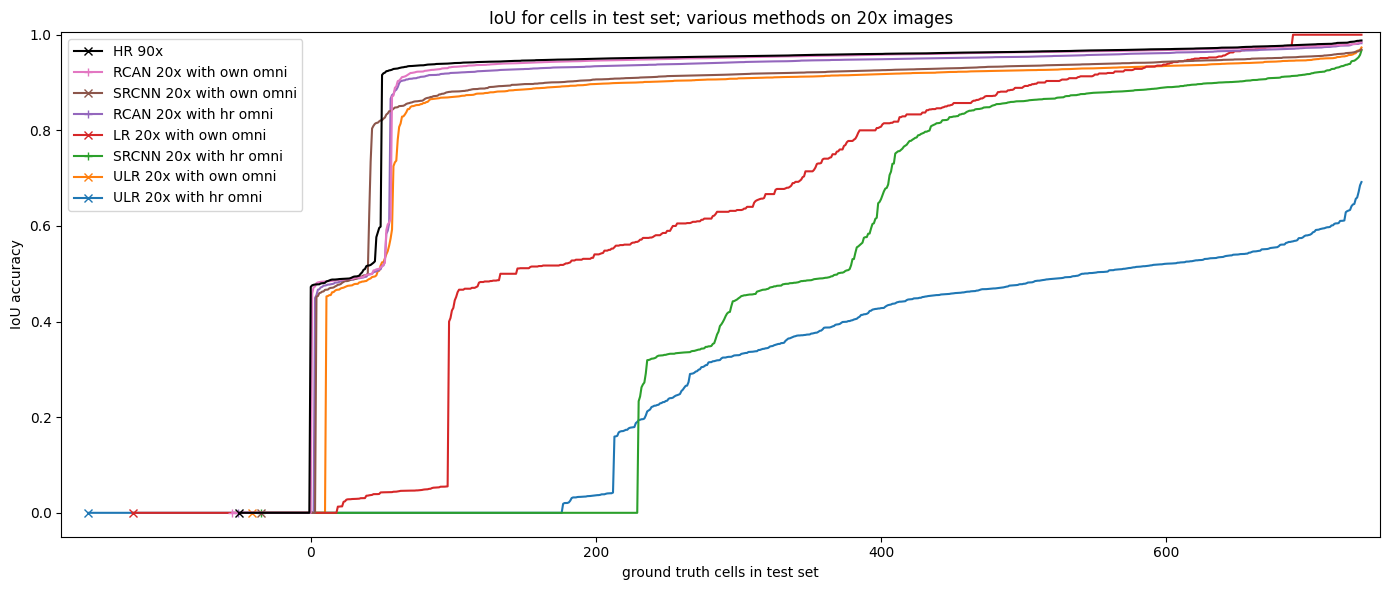

In [23]:
plot_90 = np.append(percarr_90_linear,excess_90_linear*0)
plot_20 = np.append(percarr_20_linear,excess_20_linear*0)
plot_20_own = np.append(percarr_20_linear_own,excess_20_linear_own*0)
plot_20_small = np.append(percarr_20,excess_20*0)
plot_20_rcan = np.append(percarr_20_rcan_linear,excess_20_rcan_linear*0)
plot_20_rcan_own = np.append(percarr_20_rcan_linear_own,excess_20_rcan_linear_own*0)
plot_20_sr = np.append(percarr_20_sr_linear,excess_20_sr_linear*0)
plot_20_sr_own = np.append(percarr_20_sr_linear_own,excess_20_sr_linear_own*0)


fig, axs = plt.subplots(1,1,figsize=(14,6))
l7, = axs.plot(np.arange(-len(excess_20_linear),len(percarr_20_linear)),np.sort(plot_20),"-",markevery=[0],marker="x",label="ULR 20x with hr omni") #,color="purple")
l6, = axs.plot(np.arange(-len(excess_20_linear_own),len(percarr_20_linear_own)),np.sort(plot_20_own),"-",markevery=[0],marker="x",label="ULR 20x with own omni") #,color="purple")
l5, = axs.plot(np.arange(-len(excess_20_sr_linear),len(percarr_20_sr_linear)),np.sort(plot_20_sr),"-",markevery=[0],marker="+",label="SRCNN 20x with hr omni") #,color="purple")
l4, = axs.plot(np.arange(-len(excess_20),len(percarr_20)),np.sort(plot_20_small),"-",markevery=[0],marker="x",label="LR 20x with own omni")#,color="purple")
l2, = axs.plot(np.arange(-len(excess_20_rcan_linear),len(percarr_20_rcan_linear)),np.sort(plot_20_rcan),"-",markevery=[0],marker="+",label="RCAN 20x with hr omni") #,color="purple")
l3, = axs.plot(np.arange(-len(excess_20_sr_linear_own),len(percarr_20_sr_linear_own)),np.sort(plot_20_sr_own),"-",markevery=[0],marker="x",label="SRCNN 20x with own omni") #,color="purple")
l0, = axs.plot(np.arange(-len(excess_20_rcan_linear_own),len(percarr_20_rcan_linear_own)),np.sort(plot_20_rcan_own),"-",markevery=[0],marker="+",label="RCAN 20x with own omni") #,color="purple")
l1, = axs.plot(np.arange(-len(excess_90_linear),len(percarr_90_linear)),np.sort(plot_90),"-", markevery=[0],marker="x",label="HR 90x",color="black")
axs.set_title("IoU for cells in test set; various methods on 20x images")
axs.set_ylabel("IoU accuracy")
axs.set_xlabel("ground truth cells in test set")
axs.set_ylim(None,1.005)
axs.set_xlim(-175,750)
axs.legend(handles = [l1,l0,l3,l2,l4,l5,l6,l7])

yy = [plot_20_rcan_own,plot_90,plot_20_sr_own,plot_20_rcan,plot_20_own,plot_20_small,plot_20_sr,plot_20]

fig.tight_layout()
# plt.savefig("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/report_images/lr_iou_comparison.pdf")
plt.show()

In [21]:
[np.mean(y) for y in yy]

[0.8562425147808732,
 0.8692051534756691,
 0.8522691160286582,
 0.8517032992673944,
 0.8267213120173336,
 0.5754038105812982,
 0.47693209984446094,
 0.2620386481398069]

In [51]:
excesses = [excess_20_linear,
excess_20_sr_linear,
excess_20,
excess_20_linear_own,
excess_20_sr_linear_own,
excess_20_rcan_linear,
excess_90_linear]

In [35]:
len(percarr_20_rcan_linear),len(percarr_20_sr_linear_own)

(738, 738)

In [38]:
np.mean(percarr_20_rcan_linear) * 738/(738+51)

0.8517032992673944

In [36]:
np.mean(percarr_20_sr_linear_own) * 738/(738+35)

0.8522691160286584

In [52]:
[-len(y) for y in excesses]

[-156, -35, -125, -41, -35, -51, -50]

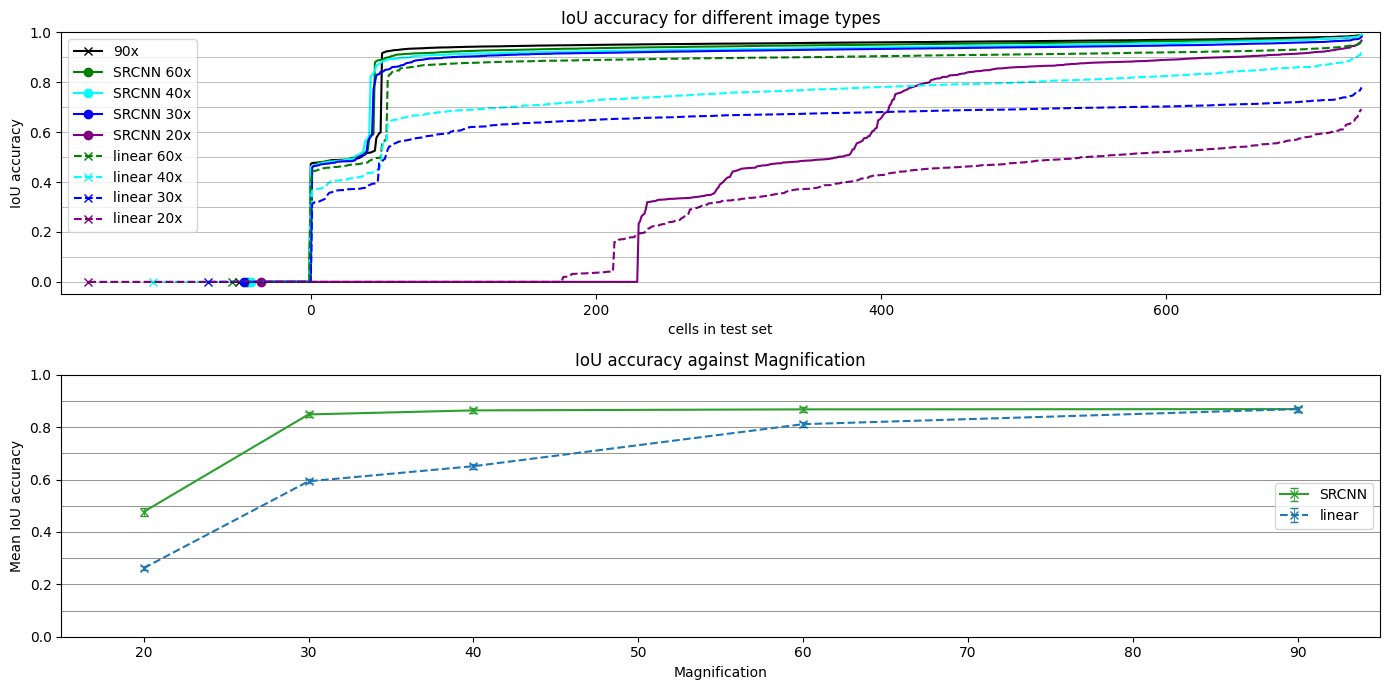

In [22]:
plot_60_sr = np.append(percarr_60_sr_linear,excess_60_sr_linear*0)
plot_40_sr = np.append(percarr_40_sr_linear,excess_40_sr_linear*0)
plot_30_sr = np.append(percarr_30_sr_linear,excess_30_sr_linear*0)
plot_20_sr = np.append(percarr_20_sr_linear,excess_20_sr_linear*0)

fig, axs = plt.subplots(2,1,figsize=(14,7))
axs[0].plot(np.arange(-len(excess_90_linear),len(percarr_90_linear)),np.sort(plot_90),"-", markevery=[0],marker="x",label="90x",color="black")
axs[0].plot(np.arange(-len(excess_60_sr_linear),len(percarr_60_sr_linear)),np.sort(plot_60_sr),"-",markevery=[0],marker="o",label="SRCNN 60x",color="green")
axs[0].plot(np.arange(-len(excess_40_sr_linear),len(percarr_40_sr_linear)),np.sort(plot_40_sr),"-",markevery=[0],marker="o",label="SRCNN 40x",color="cyan")
axs[0].plot(np.arange(-len(excess_30_sr_linear),len(percarr_30_sr_linear)),np.sort(plot_30_sr),"-",markevery=[0],marker="o",label="SRCNN 30x",color="blue")
axs[0].plot(np.arange(-len(excess_20_sr_linear),len(percarr_20_sr_linear)),np.sort(plot_20_sr),"-",markevery=[0],marker="o",label="SRCNN 20x",color="purple")
axs[0].plot(np.arange(-len(excess_60_linear),len(percarr_60_linear)),np.sort(plot_60),"--",markevery=[0],marker="x",label="linear 60x",color="green")
axs[0].plot(np.arange(-len(excess_40_linear),len(percarr_40_linear)),np.sort(plot_40),"--",markevery=[0],marker="x",label="linear 40x",color="cyan")
axs[0].plot(np.arange(-len(excess_30_linear),len(percarr_30_linear)),np.sort(plot_30),"--",markevery=[0],marker="x",label="linear 30x",color="blue")
axs[0].plot(np.arange(-len(excess_20_linear),len(percarr_20_linear)),np.sort(plot_20),"--",markevery=[0],marker="x",label="linear 20x",color="purple")
axs[0].plot([-175,750],[0.8,0.8],color='black',linewidth=0.6,alpha=0.3)
axs[0].plot([-175,750],[0.6,0.6],color='black',linewidth=0.6,alpha=0.3)
axs[0].plot([-175,750],[0.4,0.4],color='black',linewidth=0.6,alpha=0.3)
axs[0].plot([-175,750],[0.2,0.2],color='black',linewidth=0.6,alpha=0.3)
axs[0].plot([-175,750],[0.1,0.1],color='black',linewidth=0.6,alpha=0.3)
axs[0].plot([-175,750],[0.3,0.3],color='black',linewidth=0.6,alpha=0.3)
axs[0].plot([-175,750],[0.9,0.9],color='black',linewidth=0.6,alpha=0.3)
axs[0].plot([-175,750],[0.7,0.7],color='black',linewidth=0.6,alpha=0.3)
axs[0].plot([-175,750],[0.5,0.5],color='black',linewidth=0.6,alpha=0.3)
axs[0].plot([-175,750],[0  ,0  ],color='black',linewidth=0.6,alpha=0.3)
axs[0].set_title("IoU accuracy for different image types")
axs[0].set_ylabel("IoU accuracy")
axs[0].set_xlabel("cells in test set")
axs[0].set_ylim(None,1)
axs[0].set_xlim(-175,750)
axs[0].legend()

xx = [20,30,40,60,90]
yy = [plot_20,plot_30,plot_40,plot_60,plot_90]
yy2 = [plot_20_sr,plot_30_sr,plot_40_sr,plot_60_sr,plot_90]

axs[1].set_title("IoU accuracy against Magnification")
axs[1].errorbar(xx,[np.mean(y) for y in yy2],[np.std(y)/sq for y in yy2],linestyle="-",ecolor='C2',elinewidth=0.6,capsize=3,marker='x',label='SRCNN',color='C2')
axs[1].errorbar(xx,[np.mean(y) for y in yy],[np.std(y)/sq for y in yy],linestyle="--",ecolor='C0',elinewidth=0.6,capsize=3,marker='x',label='linear',color='C0')
# axs[1].plot([15,105],[1,1],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.8,0.8],color='black',linewidth=0.6,alpha=0.5)
axs[1].plot([15,105],[0.6,0.6],color='black',linewidth=0.6,alpha=0.5)
axs[1].plot([15,105],[0.4,0.4],color='black',linewidth=0.6,alpha=0.5)
axs[1].plot([15,105],[0.2,0.2],color='black',linewidth=0.6,alpha=0.5)
axs[1].plot([15,105],[0.1,0.1],color='black',linewidth=0.6,alpha=0.5)
axs[1].plot([15,105],[0.3,0.3],color='black',linewidth=0.6,alpha=0.5)
axs[1].plot([15,105],[0.9,0.9],color='black',linewidth=0.6,alpha=0.5)
axs[1].plot([15,105],[0.7,0.7],color='black',linewidth=0.6,alpha=0.5)
axs[1].plot([15,105],[0.5,0.5],color='black',linewidth=0.6,alpha=0.5)
axs[1].set_ylabel("Mean IoU accuracy")
axs[1].set_xlabel("Magnification")
axs[1].set_ylim(0,1)
axs[1].set_xlim(15,95)
axs[1].legend()
fig.tight_layout()
plt.show()

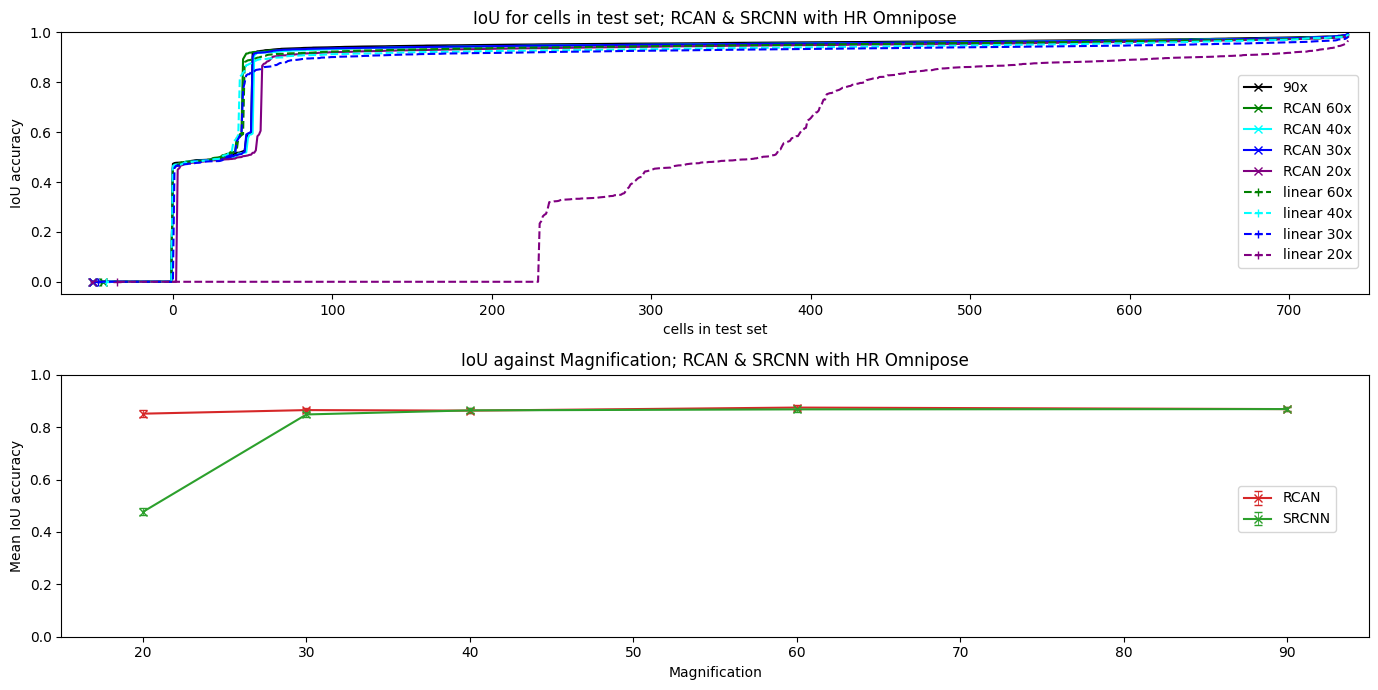

In [110]:
plot_60_rcan = np.append(percarr_60_rcan_linear,excess_60_rcan_linear*0)
plot_40_rcan = np.append(percarr_40_rcan_linear,excess_40_rcan_linear*0)
plot_30_rcan = np.append(percarr_30_rcan_linear,excess_30_rcan_linear*0)
plot_20_rcan = np.append(percarr_20_rcan_linear,excess_20_rcan_linear*0)

fig, axs = plt.subplots(2,1,figsize=(14,7))
axs[0].plot(np.arange(-len(excess_90_linear),len(percarr_90_linear)),np.sort(plot_90),"-", markevery=[0],marker="x",label="90x",color="black")
axs[0].plot(np.arange(-len(excess_60_rcan_linear),len(percarr_60_rcan_linear)),np.sort(plot_60_rcan),"-",markevery=[0],marker="x",label="RCAN 60x",color="green")
axs[0].plot(np.arange(-len(excess_40_rcan_linear),len(percarr_40_rcan_linear)),np.sort(plot_40_rcan),"-",markevery=[0],marker="x",label="RCAN 40x",color="cyan")
axs[0].plot(np.arange(-len(excess_30_rcan_linear),len(percarr_30_rcan_linear)),np.sort(plot_30_rcan),"-",markevery=[0],marker="x",label="RCAN 30x",color="blue")
axs[0].plot(np.arange(-len(excess_20_rcan_linear),len(percarr_20_rcan_linear)),np.sort(plot_20_rcan),"-",markevery=[0],marker="x",label="RCAN 20x",color="purple")
axs[0].plot(np.arange(-len(excess_60_sr_linear),len(percarr_60_sr_linear)),np.sort(plot_60_sr),"--",markevery=[0],marker="+",label="linear 60x",color="green")
axs[0].plot(np.arange(-len(excess_40_sr_linear),len(percarr_40_sr_linear)),np.sort(plot_40_sr),"--",markevery=[0],marker="+",label="linear 40x",color="cyan")
axs[0].plot(np.arange(-len(excess_30_sr_linear),len(percarr_30_sr_linear)),np.sort(plot_30_sr),"--",markevery=[0],marker="+",label="linear 30x",color="blue")
axs[0].plot(np.arange(-len(excess_20_sr_linear),len(percarr_20_sr_linear)),np.sort(plot_20_sr),"--",markevery=[0],marker="+",label="linear 20x",color="purple")
# axs[0].plot([-175,750],[0.8,0.8],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.6,0.6],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.4,0.4],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.2,0.2],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.1,0.1],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.3,0.3],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.9,0.9],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.7,0.7],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.5,0.5],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0  ,0  ],color='black',linewidth=0.6,alpha=0.3)
axs[0].set_title("IoU for cells in test set; RCAN & SRCNN with HR Omnipose")
axs[0].set_ylabel("IoU accuracy")
axs[0].set_xlabel("cells in test set")
axs[0].set_ylim(None,1)
axs[0].set_xlim(-70,750)
axs[0].legend(loc=[0.9,0.1])

xx = [20,30,40,60,90]
yy2 = [plot_20_sr,plot_30_sr,plot_40_sr,plot_60_sr,plot_90]
yy3 = [plot_20_rcan,plot_30_rcan,plot_40_rcan,plot_60_rcan,plot_90]

axs[1].set_title("IoU against Magnification; RCAN & SRCNN with HR Omnipose")
axs[1].errorbar(xx,[np.mean(y) for y in yy3],[np.std(y)/np.sqrt(len(y)) for y in yy2],linestyle="-",ecolor='C3',elinewidth=0.6,capsize=3,marker='x',label='RCAN',color='C3')
axs[1].errorbar(xx,[np.mean(y) for y in yy2],[np.std(y)/np.sqrt(len(y)) for y in yy2],linestyle="-",ecolor='C2',elinewidth=0.6,capsize=3,marker='x',label='SRCNN',color='C2')
# axs[1].plot([15,105],[1,1],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.8,0.8],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.6,0.6],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.4,0.4],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.2,0.2],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.1,0.1],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.3,0.3],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.9,0.9],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.7,0.7],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.5,0.5],color='black',linewidth=0.6,alpha=0.5)
axs[1].set_ylabel("Mean IoU accuracy")
axs[1].set_xlabel("Magnification")
axs[1].set_ylim(0,1)
axs[1].set_xlim(15,95)
axs[1].legend(loc=[0.9,0.4])
fig.tight_layout()
plt.savefig("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/report_images/rcan_iou_srcnn.pdf")
plt.show()

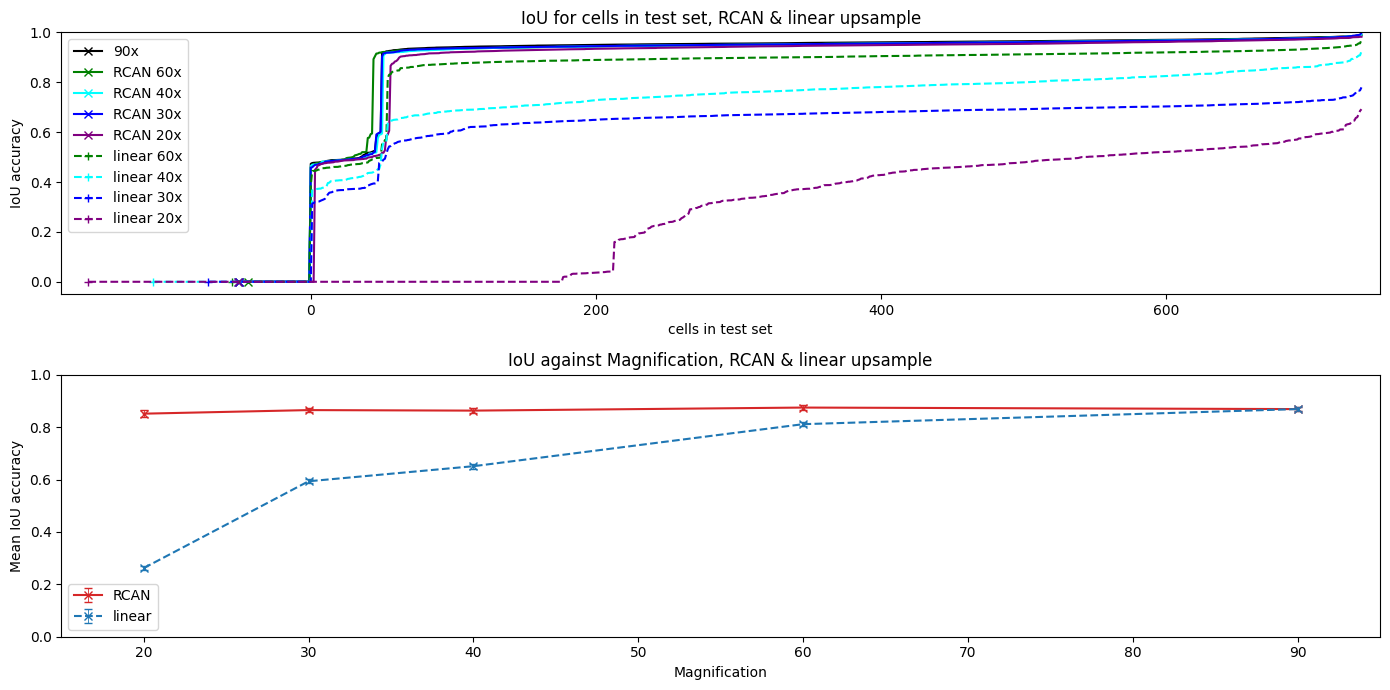

In [78]:
plot_60_rcan = np.append(percarr_60_rcan_linear,excess_60_rcan_linear*0)
plot_40_rcan = np.append(percarr_40_rcan_linear,excess_40_rcan_linear*0)
plot_30_rcan = np.append(percarr_30_rcan_linear,excess_30_rcan_linear*0)
plot_20_rcan = np.append(percarr_20_rcan_linear,excess_20_rcan_linear*0)

fig, axs = plt.subplots(2,1,figsize=(14,7))
axs[0].plot(np.arange(-len(excess_90_linear),len(percarr_90_linear)),np.sort(plot_90),"-", markevery=[0],marker="x",label="90x",color="black")
axs[0].plot(np.arange(-len(excess_60_rcan_linear),len(percarr_60_rcan_linear)),np.sort(plot_60_rcan),"-",markevery=[0],marker="x",label="RCAN 60x",color="green")
axs[0].plot(np.arange(-len(excess_40_rcan_linear),len(percarr_40_rcan_linear)),np.sort(plot_40_rcan),"-",markevery=[0],marker="x",label="RCAN 40x",color="cyan")
axs[0].plot(np.arange(-len(excess_30_rcan_linear),len(percarr_30_rcan_linear)),np.sort(plot_30_rcan),"-",markevery=[0],marker="x",label="RCAN 30x",color="blue")
axs[0].plot(np.arange(-len(excess_20_rcan_linear),len(percarr_20_rcan_linear)),np.sort(plot_20_rcan),"-",markevery=[0],marker="x",label="RCAN 20x",color="purple")
axs[0].plot(np.arange(-len(excess_60_linear),len(percarr_60_linear)),np.sort(plot_60),"--",markevery=[0],marker="+",label="linear 60x",color="green")
axs[0].plot(np.arange(-len(excess_40_linear),len(percarr_40_linear)),np.sort(plot_40),"--",markevery=[0],marker="+",label="linear 40x",color="cyan")
axs[0].plot(np.arange(-len(excess_30_linear),len(percarr_30_linear)),np.sort(plot_30),"--",markevery=[0],marker="+",label="linear 30x",color="blue")
axs[0].plot(np.arange(-len(excess_20_linear),len(percarr_20_linear)),np.sort(plot_20),"--",markevery=[0],marker="+",label="linear 20x",color="purple")
# axs[0].plot([-175,750],[0.8,0.8],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.6,0.6],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.4,0.4],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.2,0.2],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.1,0.1],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.3,0.3],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.9,0.9],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.7,0.7],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0.5,0.5],color='black',linewidth=0.6,alpha=0.3)
# axs[0].plot([-175,750],[0  ,0  ],color='black',linewidth=0.6,alpha=0.3)
axs[0].set_title("IoU for cells in test set, RCAN & linear upsample")
axs[0].set_ylabel("IoU accuracy")
axs[0].set_xlabel("cells in test set")
axs[0].set_ylim(None,1)
axs[0].set_xlim(-175,750)
axs[0].legend()

xx = [20,30,40,60,90]
yy = [plot_20,plot_30,plot_40,plot_60,plot_90]
# yy2 = [plot_20_sr,plot_30_sr,plot_40_sr,plot_60_sr,plot_90]
yy3 = [plot_20_rcan,plot_30_rcan,plot_40_rcan,plot_60_rcan,plot_90]

axs[1].set_title("IoU against Magnification, RCAN & linear upsample")
axs[1].errorbar(xx,[np.mean(y) for y in yy3],[np.std(y)/np.sqrt(len(y)) for y in yy2],linestyle="-",ecolor='C3',elinewidth=0.6,capsize=3,marker='x',label='RCAN',color='C3')
# axs[1].errorbar(xx,[np.mean(y) for y in yy2],[np.std(y)/sq for y in yy2],linestyle="-",ecolor='C2',elinewidth=0.6,capsize=3,marker='x',label='SRCNN',color='C2')
axs[1].errorbar(xx,[np.mean(y) for y in yy],[np.std(y)/np.sqrt(len(y)) for y in yy],linestyle="--",ecolor='C0',elinewidth=0.6,capsize=3,marker='x',label='linear',color='C0')
# axs[1].plot([15,105],[1,1],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.8,0.8],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.6,0.6],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.4,0.4],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.2,0.2],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.1,0.1],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.3,0.3],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.9,0.9],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.7,0.7],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.5,0.5],color='black',linewidth=0.6,alpha=0.5)
axs[1].set_ylabel("Mean IoU accuracy")
axs[1].set_xlabel("Magnification")
axs[1].set_ylim(0,1)
axs[1].set_xlim(15,95)
axs[1].legend()
fig.tight_layout()
plt.show()

In [112]:
[np.mean(y) for y in yy3]

[0.8517032992673944,
 0.8653664198492302,
 0.8633625481118867,
 0.875022983800099,
 0.8692051534756691]

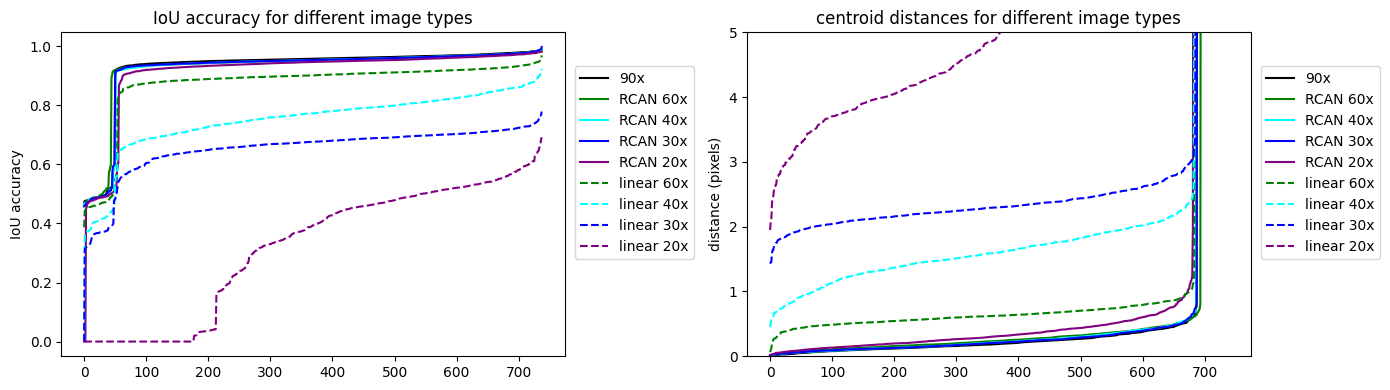

In [25]:
fig, axs = plt.subplots(1,2,figsize=(14,4))
axs[0].plot(np.sort(percarr_90_linear),"-",label="90x",color="black")
axs[0].plot(np.sort(percarr_60_rcan_linear),"-",label="RCAN 60x",color="green")
axs[0].plot(np.sort(percarr_40_rcan_linear),"-",label="RCAN 40x",color="cyan")
axs[0].plot(np.sort(percarr_30_rcan_linear),"-",label="RCAN 30x",color="blue")
axs[0].plot(np.sort(percarr_20_rcan_linear),"-",label="RCAN 20x",color="purple")
axs[0].plot(np.sort(percarr_60_linear),"--",label="linear 60x",color="green")
axs[0].plot(np.sort(percarr_40_linear),"--",label="linear 40x",color="cyan")
axs[0].plot(np.sort(percarr_30_linear),"--",label="linear 30x",color="blue")
axs[0].plot(np.sort(percarr_20_linear),"--",label="linear 20x",color="purple")
axs[0].set_title("IoU accuracy for different image types")
axs[0].set_ylabel("IoU accuracy")
# axs[0].set_ylim(0.8,1)
axs[0].legend(loc=[1.02,0.3])
axs[1].plot(np.sort(dists_90_linear),"-",label="90x",color="black")
axs[1].plot(np.sort(dists_60_rcan_linear),"-",label="RCAN 60x",color="green")
axs[1].plot(np.sort(dists_40_rcan_linear),"-",label="RCAN 40x",color="cyan")
axs[1].plot(np.sort(dists_30_rcan_linear),"-",label="RCAN 30x",color="blue")
axs[1].plot(np.sort(dists_20_rcan_linear),"-",label="RCAN 20x",color="purple")
axs[1].plot(np.sort(dists_60_linear),"--",label="linear 60x",color="green")
axs[1].plot(np.sort(dists_40_linear),"--",label="linear 40x",color="cyan")
axs[1].plot(np.sort(dists_30_linear),"--",label="linear 30x",color="blue")
axs[1].plot(np.sort(dists_20_linear),"--",label="linear 20x",color="purple")
axs[1].set_title("centroid distances for different image types")
axs[1].set_ylabel("distance (pixels)")
axs[1].set_ylim(0,5)
axs[1].legend(loc=[1.02,0.3])
fig.tight_layout()
plt.show()

In [37]:
HR_IMAGES_DIR_90 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728/convolutions/"
RCAN_IMAGES_DIR_60 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear_RCAN/"
RCAN_IMAGES_DIR_40 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear_RCAN/"
RCAN_IMAGES_DIR_30 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear_RCAN/"
RCAN_IMAGES_DIR_20 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_RCAN/"
SR_IMAGES_DIR_60 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear_SR/"
SR_IMAGES_DIR_40 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear_SR/"
SR_IMAGES_DIR_30 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear_SR/"
SR_IMAGES_DIR_20 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_SR/"
LINEAR_IMAGES_DIR_60 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear/"
LINEAR_IMAGES_DIR_40 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear/"
LINEAR_IMAGES_DIR_30 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear/"
LINEAR_IMAGES_DIR_20 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear/"

In [27]:
ssim_list_60, psnr_list_60 = get_test_ssim_psnr(HR_IMAGES_DIR_90,RCAN_IMAGES_DIR_60)
ssim_list_40, psnr_list_40 = get_test_ssim_psnr(HR_IMAGES_DIR_90,RCAN_IMAGES_DIR_40)
ssim_list_30, psnr_list_30 = get_test_ssim_psnr(HR_IMAGES_DIR_90,RCAN_IMAGES_DIR_30)
ssim_list_20, psnr_list_20 = get_test_ssim_psnr(HR_IMAGES_DIR_90,RCAN_IMAGES_DIR_20)

ssim_list_60_linear, psnr_list_60_linear = get_test_ssim_psnr(HR_IMAGES_DIR_90,LINEAR_IMAGES_DIR_60)
ssim_list_40_linear, psnr_list_40_linear = get_test_ssim_psnr(HR_IMAGES_DIR_90,LINEAR_IMAGES_DIR_40)
ssim_list_30_linear, psnr_list_30_linear = get_test_ssim_psnr(HR_IMAGES_DIR_90,LINEAR_IMAGES_DIR_30)
ssim_list_20_linear, psnr_list_20_linear = get_test_ssim_psnr(HR_IMAGES_DIR_90,LINEAR_IMAGES_DIR_20)

In [38]:
ssim_list_60_sr, psnr_list_60_sr = get_test_ssim_psnr(HR_IMAGES_DIR_90,SR_IMAGES_DIR_60)
ssim_list_40_sr, psnr_list_40_sr = get_test_ssim_psnr(HR_IMAGES_DIR_90,SR_IMAGES_DIR_40)
ssim_list_30_sr, psnr_list_30_sr = get_test_ssim_psnr(HR_IMAGES_DIR_90,SR_IMAGES_DIR_30)
ssim_list_20_sr, psnr_list_20_sr = get_test_ssim_psnr(HR_IMAGES_DIR_90,SR_IMAGES_DIR_20)

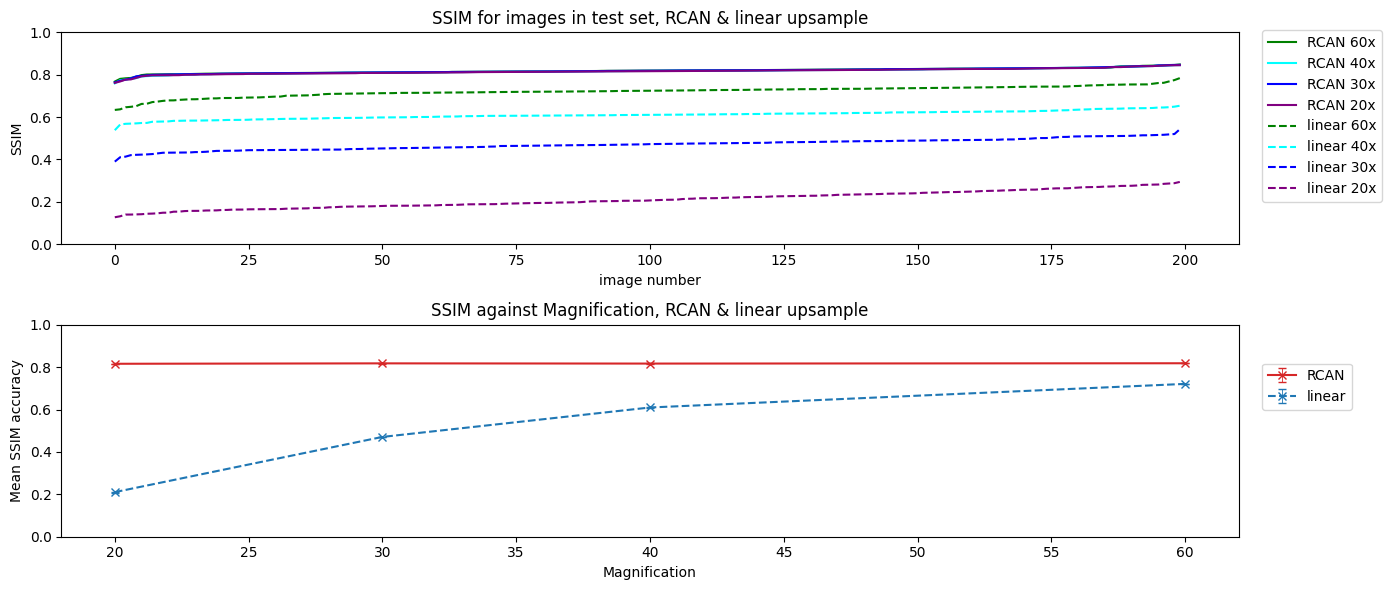

In [108]:
fig, axs = plt.subplots(2,1,figsize=(14,6))
axs[0].plot(np.sort(ssim_list_60),label="RCAN 60x",color="green")
axs[0].plot(np.sort(ssim_list_40),label="RCAN 40x",color="cyan")
axs[0].plot(np.sort(ssim_list_30),label="RCAN 30x",color="blue")
axs[0].plot(np.sort(ssim_list_20),label="RCAN 20x",color="purple")
axs[0].plot(np.sort(ssim_list_60_linear),"--",label="linear 60x",color="green")
axs[0].plot(np.sort(ssim_list_40_linear),"--",label="linear 40x",color="cyan")
axs[0].plot(np.sort(ssim_list_30_linear),"--",label="linear 30x",color="blue")
axs[0].plot(np.sort(ssim_list_20_linear),"--",label="linear 20x",color="purple")
axs[0].set_xlabel("image number")
axs[0].set_ylabel("SSIM")
axs[0].set_title("SSIM for images in test set, RCAN & linear upsample")
axs[0].legend(loc=[1.02,0.2])
axs[0].set_ylim(0,1)
axs[0].set_xlim(-10,210)

xx = [20,30,40,60]
yy = [ssim_list_20_linear,ssim_list_30_linear,ssim_list_40_linear,ssim_list_60_linear]
yy2 = [ssim_list_20,ssim_list_30,ssim_list_40,ssim_list_60]

axs[1].set_title("SSIM against Magnification, RCAN & linear upsample")
axs[1].errorbar(xx,[np.mean(y) for y in yy2],[np.std(y)/np.sqrt(len(y)) for y in yy2],linestyle="-",ecolor='C3',elinewidth=0.6,capsize=3,marker='x',label='RCAN',color='C3')
axs[1].errorbar(xx,[np.mean(y) for y in yy],[np.std(y)/np.sqrt(len(y)) for y in yy],linestyle="--",ecolor='C0',elinewidth=0.6,capsize=3,marker='x',label='linear',color='C0')
axs[1].plot([15,105],[1,1],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.8,0.8],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.6,0.6],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.4,0.4],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.2,0.2],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.1,0.1],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.3,0.3],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.9,0.9],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.7,0.7],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.5,0.5],color='black',linewidth=0.6)
axs[1].set_ylabel("Mean SSIM accuracy")
axs[1].set_xlabel("Magnification")
axs[1].set_ylim(0,1)
axs[1].set_xlim(18,62)
axs[1].legend(loc=[1.02,0.6])
fig.tight_layout()
plt.savefig("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/report_images/rcan_ssim_linear.pdf")
plt.show()

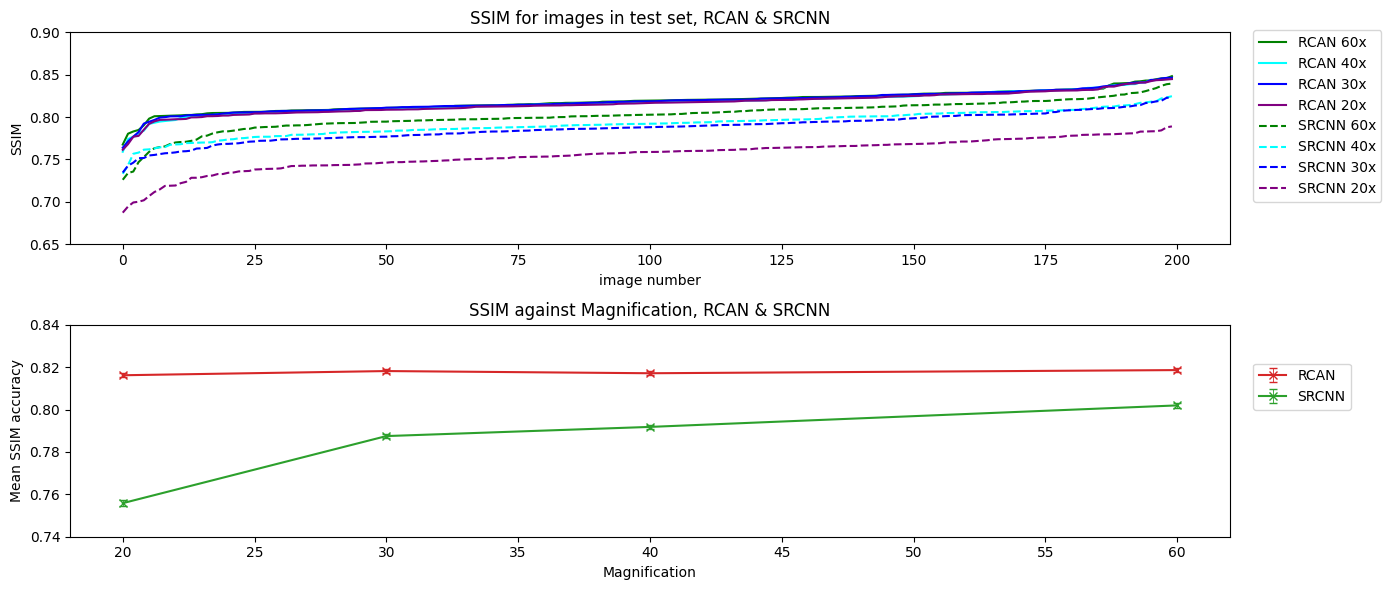

In [105]:
fig, axs = plt.subplots(2,1,figsize=(14,6))
axs[0].plot(np.sort(ssim_list_60),label="RCAN 60x",color="green")
axs[0].plot(np.sort(ssim_list_40),label="RCAN 40x",color="cyan")
axs[0].plot(np.sort(ssim_list_30),label="RCAN 30x",color="blue")
axs[0].plot(np.sort(ssim_list_20),label="RCAN 20x",color="purple")
axs[0].plot(np.sort(ssim_list_60_sr),"--",label="SRCNN 60x",color="green")
axs[0].plot(np.sort(ssim_list_40_sr),"--",label="SRCNN 40x",color="cyan")
axs[0].plot(np.sort(ssim_list_30_sr),"--",label="SRCNN 30x",color="blue")
axs[0].plot(np.sort(ssim_list_20_sr),"--",label="SRCNN 20x",color="purple")
axs[0].set_xlabel("image number")
axs[0].set_ylabel("SSIM")
axs[0].set_title("SSIM for images in test set, RCAN & SRCNN")
axs[0].legend(loc=[1.02,0.2])
axs[0].set_ylim(0.65,0.9)
axs[0].set_xlim(-10,210)

xx = [20,30,40,60]
yy = [ssim_list_20_sr,ssim_list_30_sr,ssim_list_40_sr,ssim_list_60_sr]
yy2 = [ssim_list_20,ssim_list_30,ssim_list_40,ssim_list_60]

axs[1].set_title("SSIM against Magnification, RCAN & SRCNN")
axs[1].errorbar(xx,[np.mean(y) for y in yy2],[np.std(y)/np.sqrt(len(y)) for y in yy2],linestyle="-",ecolor='C3',elinewidth=0.6,capsize=3,marker='x',label='RCAN',color='C3')
axs[1].errorbar(xx,[np.mean(y) for y in yy],[np.std(y)/np.sqrt(len(y)) for y in yy],linestyle="-",ecolor='C2',elinewidth=0.6,capsize=3,marker='x',label='SRCNN',color='C2')
axs[1].plot([15,105],[1,1],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.8,0.8],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.6,0.6],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.4,0.4],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.2,0.2],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.1,0.1],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.3,0.3],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.9,0.9],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.7,0.7],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.5,0.5],color='black',linewidth=0.6)
axs[1].set_ylabel("Mean SSIM accuracy")
axs[1].set_xlabel("Magnification")
axs[1].set_ylim(0.74,0.84)
axs[1].set_xlim(18,62)
axs[1].legend(loc=[1.02,0.6])
fig.tight_layout()
# plt.savefig("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/report_images/rcan_ssim_srcnn.pdf")
plt.show()

In [109]:
[np.mean(y) for y in yy]

[0.21043777, 0.4709999, 0.60989755, 0.72128797]

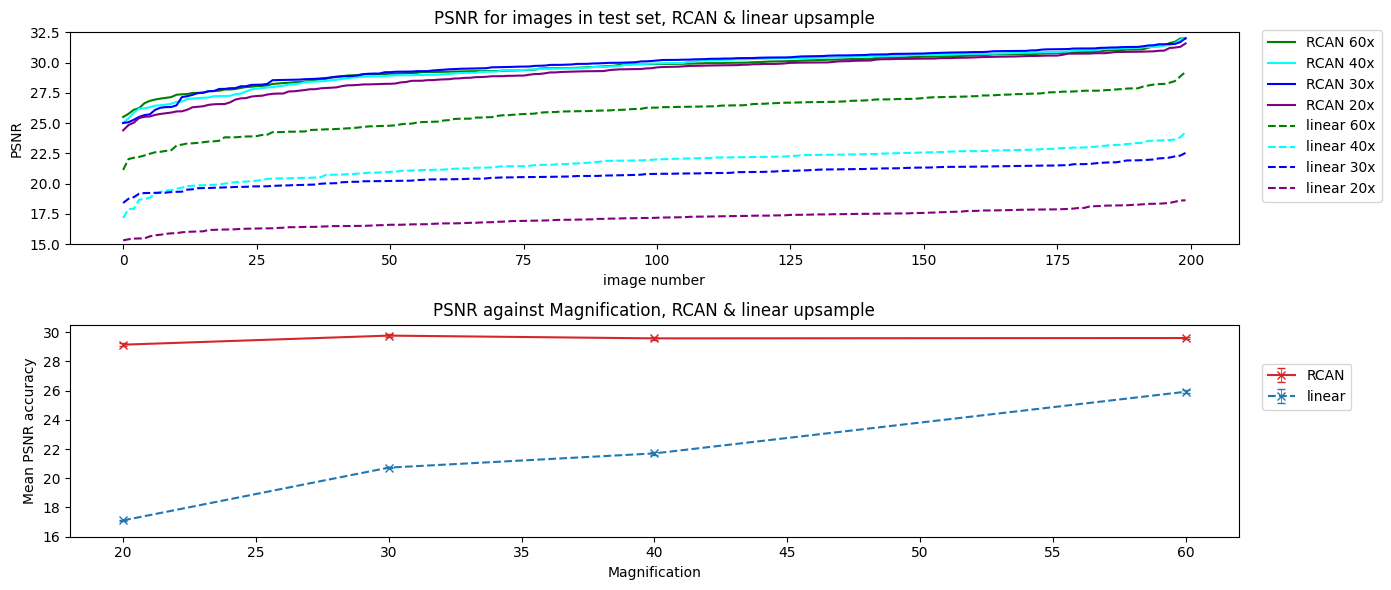

In [94]:
fig, axs = plt.subplots(2,1,figsize=(14,6))
axs[0].plot(np.sort(psnr_list_60),label="RCAN 60x",color="green")
axs[0].plot(np.sort(psnr_list_40),label="RCAN 40x",color="cyan")
axs[0].plot(np.sort(psnr_list_30),label="RCAN 30x",color="blue")
axs[0].plot(np.sort(psnr_list_20),label="RCAN 20x",color="purple")
axs[0].plot(np.sort(psnr_list_60_linear),"--",label="linear 60x",color="green")
axs[0].plot(np.sort(psnr_list_40_linear),"--",label="linear 40x",color="cyan")
axs[0].plot(np.sort(psnr_list_30_linear),"--",label="linear 30x",color="blue")
axs[0].plot(np.sort(psnr_list_20_linear),"--",label="linear 20x",color="purple")
axs[0].set_xlabel("image number")
axs[0].set_ylabel("PSNR")
axs[0].set_title("PSNR for images in test set, RCAN & linear upsample")
axs[0].legend(loc=[1.02,0.2])
axs[0].set_ylim(15,32.5)

xx = [20,30,40,60]
yy = [psnr_list_20_linear,psnr_list_30_linear,psnr_list_40_linear,psnr_list_60_linear]
yy2 = [psnr_list_20,psnr_list_30,psnr_list_40,psnr_list_60]


axs[1].set_title("PSNR against Magnification, RCAN & linear upsample")
axs[1].errorbar(xx,[np.mean(y) for y in yy2],[np.std(y)/np.sqrt(len(y)) for y in yy2],linestyle="-",ecolor='C3',elinewidth=0.6,capsize=3,marker='x',label='RCAN',color='C3')
axs[1].errorbar(xx,[np.mean(y) for y in yy],[np.std(y)/np.sqrt(len(y)) for y in yy],linestyle="--",ecolor='C0',elinewidth=0.6,capsize=3,marker='x',label='linear',color='C0')
# axs[1].plot([15,105],[1,1],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.8,0.8],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.6,0.6],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.4,0.4],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.2,0.2],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.1,0.1],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.3,0.3],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.9,0.9],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.7,0.7],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.5,0.5],color='black',linewidth=0.6,alpha=0.5)
axs[1].set_ylabel("Mean PSNR accuracy")
axs[1].set_xlabel("Magnification")
axs[1].set_ylim(16,30.5)
# axs[1].set_xlim(15,65)
axs[1].legend(loc=[1.02,0.6])
axs[1].set_yticks([16,18,20,22,24,26,28,30])
fig.tight_layout()
plt.savefig("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/report_images/rcan_psnr_linear.pdf")
plt.show()

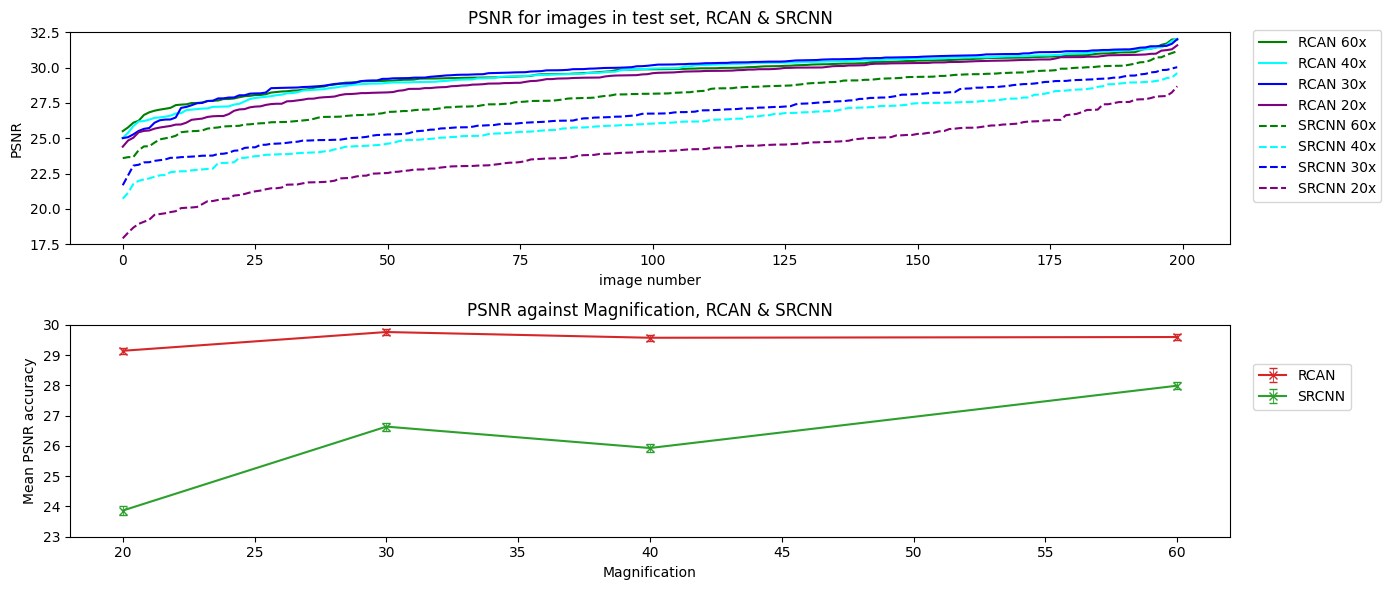

In [102]:
fig, axs = plt.subplots(2,1,figsize=(14,6))
axs[0].plot(np.sort(psnr_list_60),label="RCAN 60x",color="green")
axs[0].plot(np.sort(psnr_list_40),label="RCAN 40x",color="cyan")
axs[0].plot(np.sort(psnr_list_30),label="RCAN 30x",color="blue")
axs[0].plot(np.sort(psnr_list_20),label="RCAN 20x",color="purple")
axs[0].plot(np.sort(psnr_list_60_sr),"--",label="SRCNN 60x",color="green")
axs[0].plot(np.sort(psnr_list_40_sr),"--",label="SRCNN 40x",color="cyan")
axs[0].plot(np.sort(psnr_list_30_sr),"--",label="SRCNN 30x",color="blue")
axs[0].plot(np.sort(psnr_list_20_sr),"--",label="SRCNN 20x",color="purple")
axs[0].set_xlabel("image number")
axs[0].set_ylabel("PSNR")
axs[0].set_title("PSNR for images in test set, RCAN & SRCNN")
axs[0].legend(loc=[1.02,0.2])
axs[0].set_ylim(17.5,32.5)

xx = [20,30,40,60]
yy = [psnr_list_20_sr,psnr_list_30_sr,psnr_list_40_sr,psnr_list_60_sr]
yy2 = [psnr_list_20,psnr_list_30,psnr_list_40,psnr_list_60]


axs[1].set_title("PSNR against Magnification, RCAN & SRCNN")
axs[1].errorbar(xx,[np.mean(y) for y in yy2],[np.std(y)/np.sqrt(len(y)) for y in yy2],linestyle="-",ecolor='C3',elinewidth=0.6,capsize=3,marker='x',label='RCAN',color='C3')
axs[1].errorbar(xx,[np.mean(y) for y in yy],[np.std(y)/np.sqrt(len(y)) for y in yy],linestyle="-",ecolor='C2',elinewidth=0.6,capsize=3,marker='x',label='SRCNN',color='C2')
# axs[1].plot([15,105],[1,1],color='black',linewidth=0.6)
# axs[1].plot([15,105],[0.8,0.8],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.6,0.6],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.4,0.4],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.2,0.2],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.1,0.1],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.3,0.3],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.9,0.9],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.7,0.7],color='black',linewidth=0.6,alpha=0.5)
# axs[1].plot([15,105],[0.5,0.5],color='black',linewidth=0.6,alpha=0.5)
axs[1].set_ylabel("Mean PSNR accuracy")
axs[1].set_xlabel("Magnification")
axs[1].set_ylim(23,30)
# axs[1].set_xlim(15,65)
axs[1].legend(loc=[1.02,0.6])
fig.tight_layout()
# plt.savefig("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/report_images/rcan_psnr_srcnn.pdf")
plt.show()

In [103]:
[np.mean(y) for y in yy2]

[29.142126, 29.762405, 29.573013, 29.597134]

In [104]:
[np.mean(y) for y in yy]

[23.86493, 26.636982, 25.930605, 27.989511]

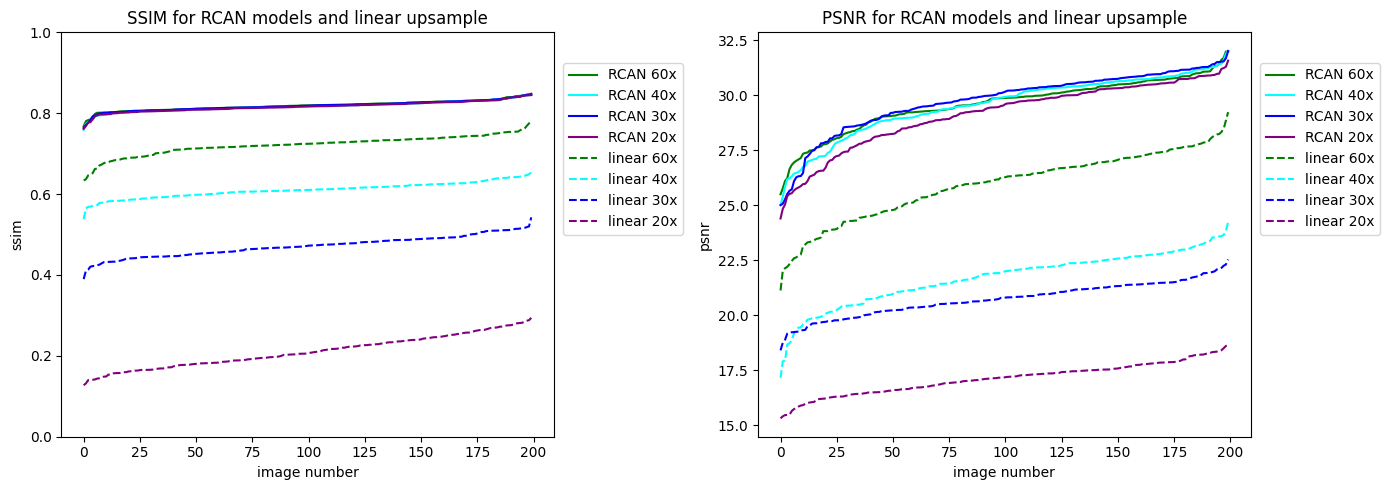

In [30]:
fig,axs = plt.subplots(1,2,figsize=(14,5))
axs[0].plot(np.sort(ssim_list_60),label="RCAN 60x",color="green")
axs[0].plot(np.sort(ssim_list_40),label="RCAN 40x",color="cyan")
axs[0].plot(np.sort(ssim_list_30),label="RCAN 30x",color="blue")
axs[0].plot(np.sort(ssim_list_20),label="RCAN 20x",color="purple")
axs[0].plot(np.sort(ssim_list_60_linear),"--",label="linear 60x",color="green")
axs[0].plot(np.sort(ssim_list_40_linear),"--",label="linear 40x",color="cyan")
axs[0].plot(np.sort(ssim_list_30_linear),"--",label="linear 30x",color="blue")
axs[0].plot(np.sort(ssim_list_20_linear),"--",label="linear 20x",color="purple")
axs[0].set_xlabel("image number")
axs[0].set_ylabel("ssim")
axs[0].set_title("SSIM for RCAN models and linear upsample")
axs[0].legend(loc=[1.02,0.5])
axs[0].set_ylim(0,1)

axs[1].plot(np.sort(psnr_list_60),label="RCAN 60x",color="green")
axs[1].plot(np.sort(psnr_list_40),label="RCAN 40x",color="cyan")
axs[1].plot(np.sort(psnr_list_30),label="RCAN 30x",color="blue")
axs[1].plot(np.sort(psnr_list_20),label="RCAN 20x",color="purple")
axs[1].plot(np.sort(psnr_list_60_linear),"--",label="linear 60x",color="green")
axs[1].plot(np.sort(psnr_list_40_linear),"--",label="linear 40x",color="cyan")
axs[1].plot(np.sort(psnr_list_30_linear),"--",label="linear 30x",color="blue")
axs[1].plot(np.sort(psnr_list_20_linear),"--",label="linear 20x",color="purple")
axs[1].set_xlabel("image number")
axs[1].set_ylabel("psnr")
axs[1].set_title("PSNR for RCAN models and linear upsample")
axs[1].legend(loc=[1.02,0.5])
fig.tight_layout()
plt.show()